In [64]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # Adjusts the configuration of the plots I create

# Read the data

df = pd.read_csv(r'C:\Users\dchek\OneDrive\Desktop\Data_Projects\movies.csv')



In [4]:
#Check the data import
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [18]:
#Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
#Check datatypes for the columns in the dataset

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [68]:
#Change datatype of Budget, Gross, Votes, and Runtime columns to remove .0 

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int)
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce').fillna(0).astype(int) 

In [38]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",1980


In [71]:
# Function to get Full date of release and separate year as an additional column
# as there were some errors in year column (didnt match the year of release)

def extract_date_year(text):
    # Find full date like "June 13, 1980"
    date_match = re.search(r'([A-Za-z]+\s\d{1,2},\s\d{4})', text)
    release_date = date_match.group(1) if date_match else None

    # Find just the 4-digit year
    year_match = re.search(r'\d{4}', text)
    year = year_match.group(0) if year_match else None

    return pd.Series([release_date, year])

# Apply the function to the DataFrame and create 2 new columns "Release_Date" and "Release_Year"
df[['release_date', 'release_year']] = df['released'].astype(str).apply(extract_date_year)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",2018


In [72]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [42]:
#Hypothesis:
# Budged has high correlation with revenue
# Company has high correlation with revenue

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

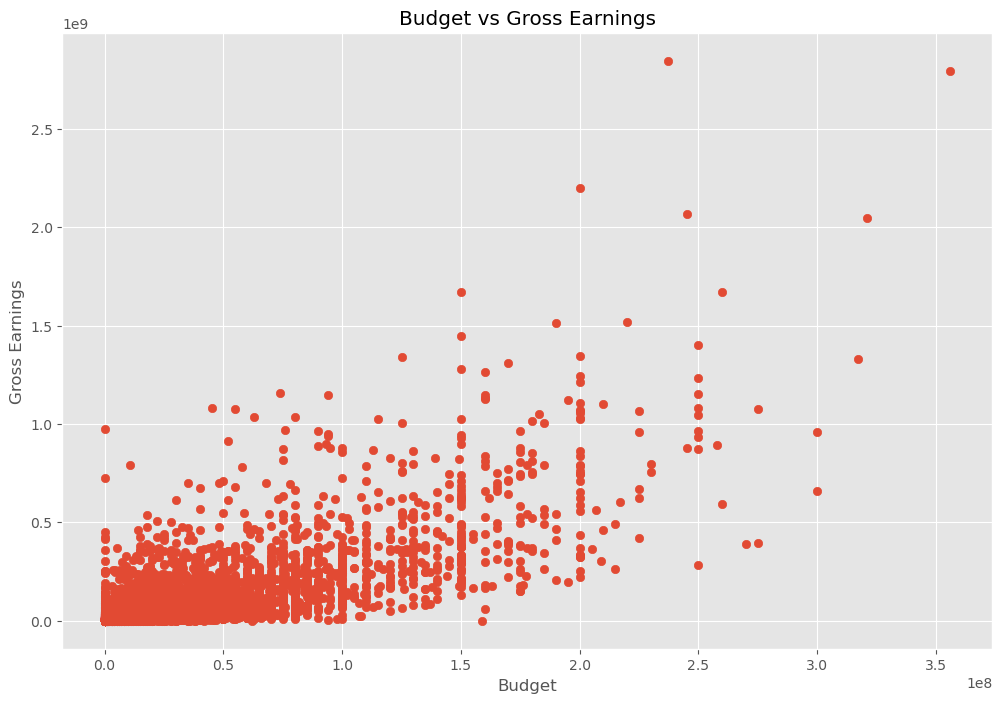

In [49]:
#Scatter plot with Budged vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')

plt.ylabel('Gross Earnings')

plt.show()

In [46]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",2018


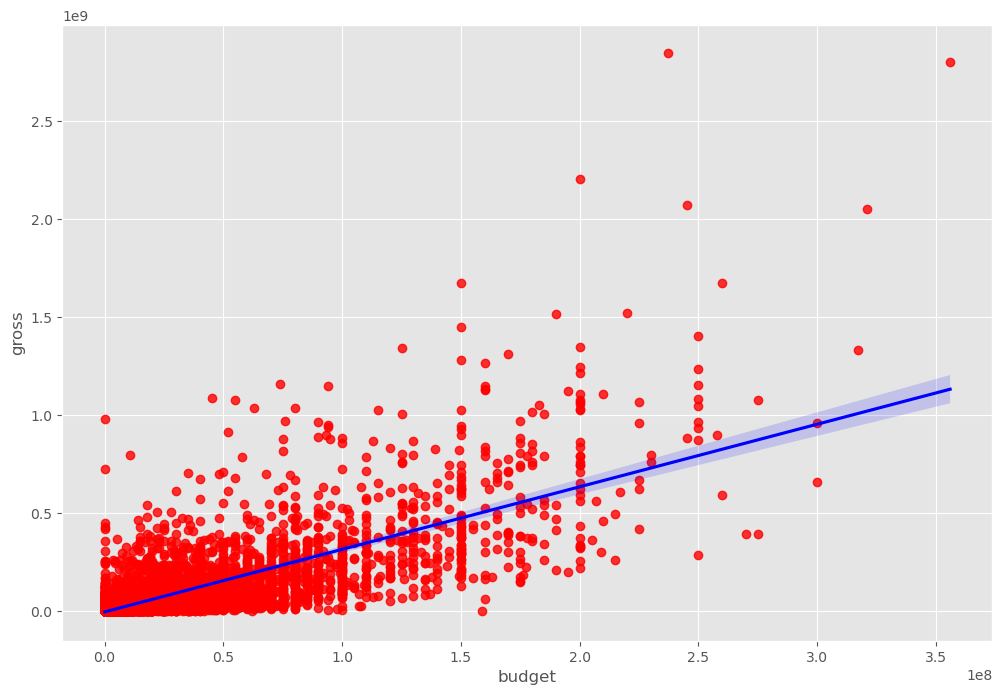

In [55]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.show()

In [57]:
#Looking at correlations between numeric columns

corr_matrix = df.select_dtypes(include='number').corr(method='Pearson')
print(corr_matrix)

            score     votes    budget     gross   runtime
score    1.000000  0.409182  0.055665  0.186392  0.398387
votes    0.409182  1.000000  0.486931  0.632870  0.306984
budget   0.055665  0.486931  1.000000  0.750157  0.268372
gross    0.186392  0.632870  0.750157  1.000000  0.244339
runtime  0.398387  0.306984  0.268372  0.244339  1.000000


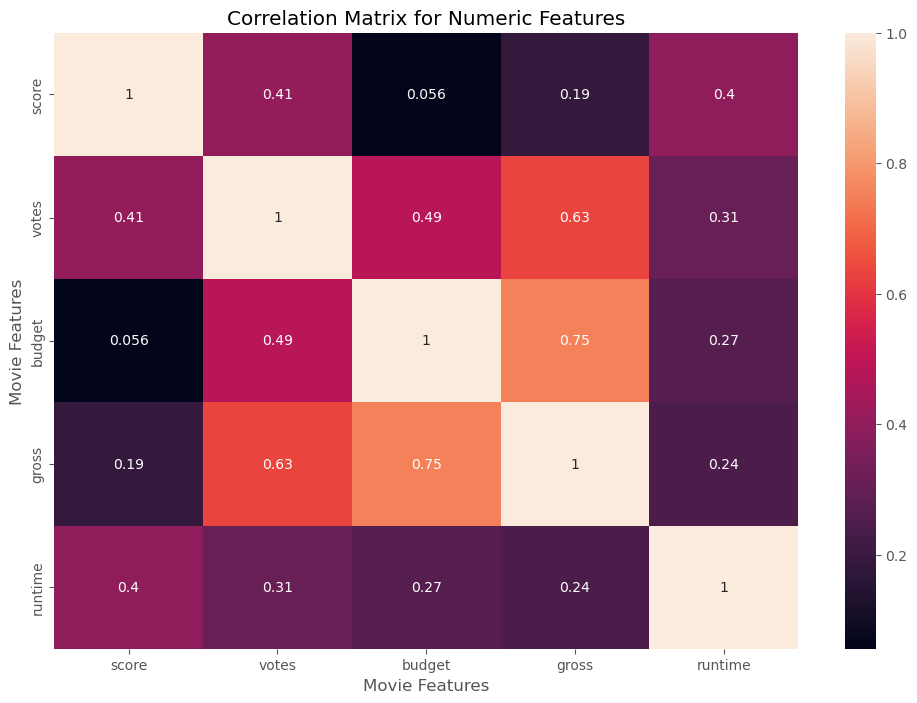

In [59]:
#Confirmed that there is high correlation between Budged and Gross
# Visualize the correlation

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [73]:
#Checking second hypothesis
#Changing all object columns into numeric representation

df_numerized = df.copy() #Created a new table and copied all data from the first one

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,596,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,142,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,602,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,598,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,150,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,2860,6,5,1988,2483,5.9,3000,2440,3766,1096,55,1000000,0,675,97,2144,8
1381,62,-1,14,1988,1346,6.0,1200,397,622,624,14,0,0,526,88,1165,9
1389,3967,6,4,1988,2346,4.9,2200,1317,3455,2676,55,210000,0,1653,81,2025,8
1405,2435,6,6,1988,2137,5.4,1200,1855,2860,1184,55,0,0,2303,93,1856,9


In [74]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,Jack's Back,R,Crime,1988,"May 6, 1988 (United States)",5.9,3000,Rowdy Herrington,Rowdy Herrington,James Spader,United States,1000000,0,Cinema Group,97,"May 6, 1988",1988
1381,36 fillette,NaN,Romance,1988,"January 6, 1989 (United States)",6.0,1200,Catherine Breillat,Catherine Breillat,Delphine Zentout,France,0,0,CB Films,88,"January 6, 1989",1989
1389,Not of This Earth,R,Comedy,1988,"May 20, 1988 (United States)",4.9,2200,Jim Wynorski,R.J. Robertson,Traci Lords,United States,210000,0,Miracle Pictures,81,"May 20, 1988",1988
1405,Heart of Midnight,R,Drama,1988,"March 3, 1989 (United States)",5.4,1200,Matthew Chapman,Matthew Chapman,Jennifer Jason Leigh,United States,0,0,Virgin Vision,93,"March 3, 1989",1989


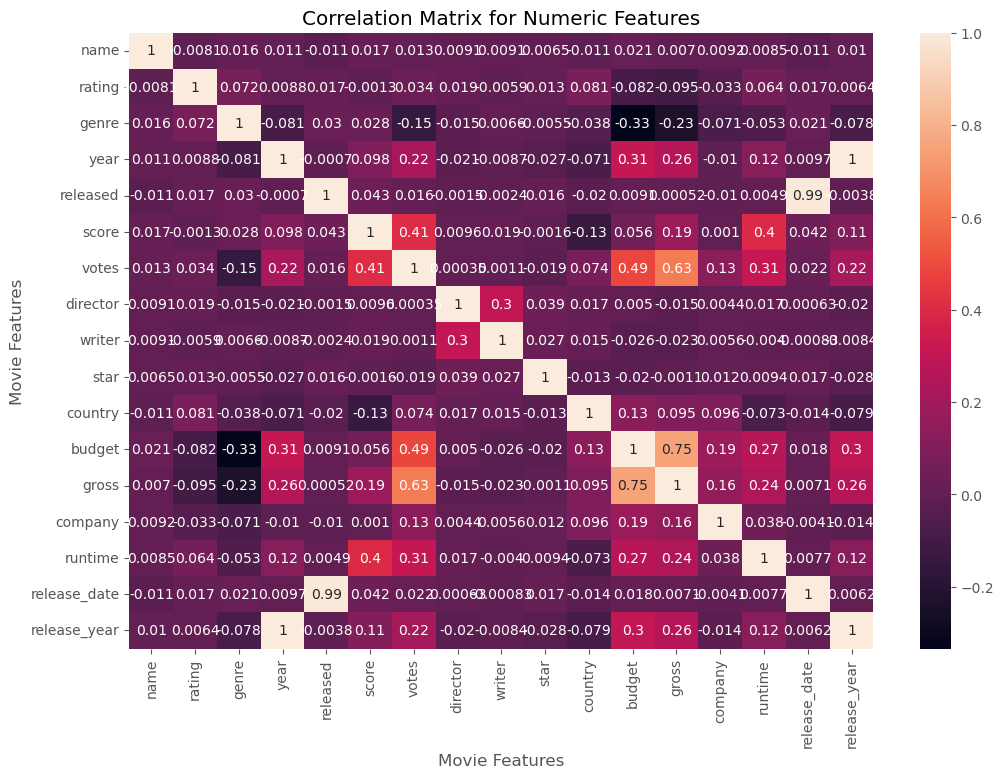

In [76]:
#Creating a Heatmap of all the possible data we have, to se if there is any correlation in any pairs

corr_matrix = df_numerized.select_dtypes(include='number').corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [80]:
#Other way to check the highest correlations between our data

correlation_mat = df_numerized.corr()
sorted_pairs = correlation_mat.unstack().sort_values()
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

votes         gross           0.632870
gross         votes           0.632870
              budget          0.750157
budget        gross           0.750157
released      release_date    0.987641
release_date  released        0.987641
year          release_year    0.996397
release_year  year            0.996397
              release_year    1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
release_date  release_date    1.000000
rating        rating          1.000000
name          name            1.000000
dtype: float64

In [ ]:
# The second hypothesis was not confirmed, company has low correlation to Gross Earnings
#But Votes and Budged do have high correlation to Gross Earnings